# 📊 Análise e Agregação de Dados com Pandas

## 1. Introdução

Neste projeto, o foco é demonstrar como a **análise de agregação** pode ser utilizada para transformar dados brutos em resumos informativos e insights acionáveis. Utilizaremos a biblioteca `pandas` para agrupar e resumir dados de vendas hipotéticas, respondendo a perguntas de negócio como "qual produto vendeu mais?" e "qual região gerou maior receita?".

---
## 2. Importação de Bibliotecas

Primeiro, importamos as bibliotecas necessárias para a análise: `pandas` para manipulação de dados, e `matplotlib` e `seaborn` para visualização.



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhorar a visualização
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

---
## 3. Carregamento e Visualização Inicial dos Dados
Vamos criar um `DataFrame` de exemplo que representa um conjunto de dados de vendas.

In [2]:
# Criando um DataFrame de exemplo
data = {
    'ID_Venda': range(101, 121),
    'Data': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2024-06-30'), 20)),
    'Regiao': np.random.choice(['Norte', 'Sul', 'Leste', 'Oeste'], 20),
    'Produto': np.random.choice(['Produto A', 'Produto B', 'Produto C', 'Produto D'], 20),
    'Categoria': np.random.choice(['Eletrônicos', 'Vestuário', 'Alimentos'], 20),
    'Quantidade': np.random.randint(1, 10, 20),
    'Preco_Unitario': np.random.uniform(10, 100, 20).round(2)
}

df_vendas = pd.DataFrame(data)

# Criando a coluna de receita total
df_vendas['Receita'] = df_vendas['Quantidade'] * df_vendas['Preco_Unitario']

# Exibindo as primeiras linhas do DataFrame
print("Primeiras 5 linhas do DataFrame:")
display(df_vendas.head())

# Verificando informações gerais sobre os dados
print("\nInformações sobre o DataFrame:")
df_vendas.info()

Primeiras 5 linhas do DataFrame:


,ID_Venda,Data,Regiao,Produto,Categoria,Quantidade,Preco_Unitario,Receita
0,101,2024-04-28,Norte,Produto D,Eletrônicos,5,10.68,53.40
1,102,2024-05-31,Leste,Produto A,Vestuário,9,84.29,758.61
2,103,2024-03-04,Sul,Produto D,Eletrônicos,1,68.89,68.89
3,104,2024-01-07,Norte,Produto A,Eletrônicos,9,23.07,207.63
4,105,2024-04-15,Norte,Produto D,Eletrônicos,9,36.30,326.70



Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Venda        20 non-null     int64         
 1   Data            20 non-null     datetime64[ns]
 2   Regiao          20 non-null     object        
 3   Produto         20 non-null     object        
 4   Categoria       20 non-null     object        
 5   Quantidade      20 non-null     int32         
 6   Preco_Unitario  20 non-null     float64       
 7   Receita         20 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 1.3+ KB


---
## 4. Análise e Agregação de Dados
Aqui, usamos o método `.groupby()` do pandas para agrupar os dados e aplicar funções de agregação, como `sum()`, `mean()`, `count()`, etc.  
### 01_Agrupamento por Produto  
Vamos calcular a **receita total** e a **quantidade vendida por produto**.

Receita total e quantidade por produto (ordenado):


,Produto,Receita_Total,Quantidade_Total
3,Produto D,2517.53,54
0,Produto A,1994.40,32
2,Produto C,858.76,14
1,Produto B,542.54,11


C:\Users\marlo\AppData\Local\Temp\ipykernel_2312\2332188748.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Produto', y='Receita_Total', data=vendas_por_produto_ordenado, palette='viridis')


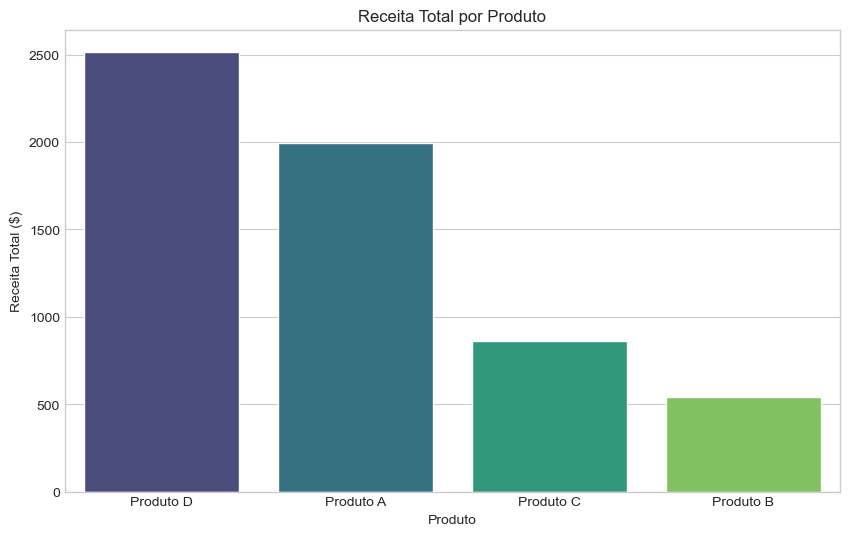

In [3]:
# Agrupando por 'Produto' e somando 'Quantidade' e 'Receita'
vendas_por_produto = df_vendas.groupby('Produto').agg(
    Receita_Total=('Receita', 'sum'),
    Quantidade_Total=('Quantidade', 'sum')
).reset_index()

# Ordenando para ver os produtos mais vendidos
vendas_por_produto_ordenado = vendas_por_produto.sort_values(by='Receita_Total', ascending=False)
print("Receita total e quantidade por produto (ordenado):")
display(vendas_por_produto_ordenado)

# Visualização: Receita por Produto
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Receita_Total', data=vendas_por_produto_ordenado, palette='viridis')
plt.title('Receita Total por Produto')
plt.xlabel('Produto')
plt.ylabel('Receita Total ($)')
plt.show()

### 02_Agrupamento por Múltiplas Colunas  
Agora, vamos analisar a receita total por **região** e **categoria**.

Receita por Região e Categoria:


,Regiao,Categoria,Receita_Total
0,Leste,Alimentos,1457.54
1,Leste,Vestuário,801.30
2,Norte,Alimentos,452.83
3,Norte,Eletrônicos,768.32
4,Norte,Vestuário,120.60
5,Oeste,Eletrônicos,472.92
6,Oeste,Vestuário,800.25
7,Sul,Alimentos,587.40
8,Sul,Eletrônicos,452.07


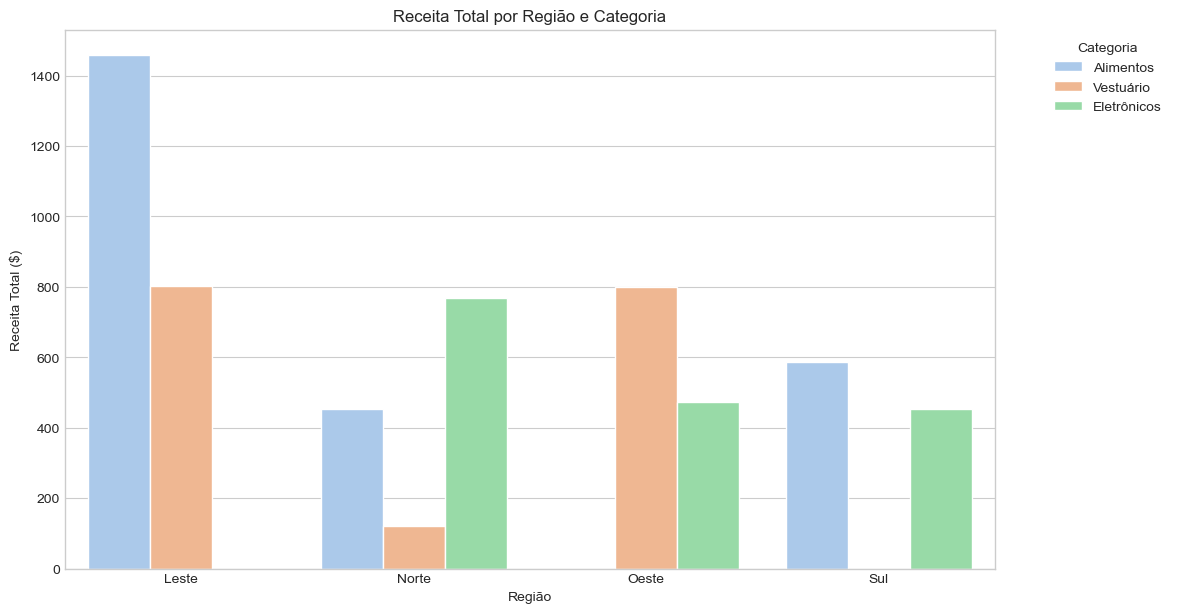

In [5]:
# Agrupando por 'Regiao' e 'Categoria'
receita_por_regiao_categoria = df_vendas.groupby(['Regiao', 'Categoria']).agg(
    Receita_Total=('Receita', 'sum')
).reset_index()

print("Receita por Região e Categoria:")
display(receita_por_regiao_categoria)

# Visualização: Receita por Região e Categoria
plt.figure(figsize=(12, 7))
sns.barplot(x='Regiao', y='Receita_Total', hue='Categoria', data=receita_por_regiao_categoria, palette='pastel')
plt.title('Receita Total por Região e Categoria')
plt.xlabel('Região')
plt.ylabel('Receita Total ($)')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 03_Tabela Dinâmica (`.pivot_table()`)
Para uma visualização de tabela mais clara, podemos usar `pivot_table` para resumir os dados.

In [6]:
# Criando uma tabela dinâmica para mostrar a soma das quantidades por Região e Categoria
tabela_dinamica_quantidade = df_vendas.pivot_table(
    values='Quantidade',
    index='Regiao',
    columns='Categoria',
    aggfunc='sum',
    fill_value=0
)

print("Tabela Dinâmica: Quantidade vendida por Região e Categoria")
display(tabela_dinamica_quantidade)

Tabela Dinâmica: Quantidade vendida por Região e Categoria


Categoria,Alimentos,Eletrônicos,Vestuário
Regiao,,,
Leste,28,0,12
Norte,7,28,2
Oeste,0,6,11
Sul,9,8,0


---
## 🏁 5. Conclusão
Através da agregação de dados, foi possível obter rapidamente insights valiosos sobre o desempenho das vendas. A análise mostrou:
- Os produtos com **maior** e **menor receita**.  
- O desempenho de **vendas** em **diferentes regiões** e **categorias**.  
- Uma visão geral da **distribuição de vendas** por **região** e **categoria** através da **tabela dinâmica**.

